In [146]:
import numpy as np
import h5py
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
import xgboost as xgb
import pandas as pd

def unison_shuffled_copies(a, b, c):
    assert len(a) == len(b) == len(c)
    p = np.random.permutation(len(a))
    return a[p], b[p], c[p], p

def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [242]:
x = np.zeros((50000,471))
counter = 0

with h5py.File('input/simulation_data_cutoff_10to20.hdf5','r') as sim_data1:
    with h5py.File('input/simulation_data_cutoff_130722.hdf5','r') as sim_data2:
        with h5py.File('input/simulation_data_cutoff_100to150.hdf5','r') as sim_data3:
            for nstudies in range(10,150):
                if nstudies < 20:
                    sim_data = sim_data1
                    reps = 500
                elif (nstudies >= 20) and (nstudies < 100):
                    sim_data = sim_data2
                    reps = 500
                else:
                    sim_data = sim_data3
                    reps = 100
                for rep in range(reps):

                    
                    x[counter,0] = nstudies
                    
                    nfoci = sim_data[f'{nstudies}/{rep}/nfoci'][:]
                    x[counter,1] = np.sum(nfoci)
                    x[counter,2] = np.mean(nfoci)
                    x[counter,3] = np.median(nfoci)
                    x[counter,4] = np.std(nfoci)
                    x[counter,5] = np.max(nfoci)
                    x[counter,6] = np.min(nfoci)
                    
                    nsub = sim_data[f'{nstudies}/{rep}/nsub'][:]
                    x[counter,7] = np.sum(nsub)
                    x[counter,8] = np.mean(nsub)
                    x[counter,9] = np.median(nsub)
                    x[counter,10] = np.std(nsub)
                    x[counter,11] = np.max(nsub)
                    x[counter,12] = np.min(nsub)

                    x[counter,13]= np.mean(nfoci / nsub)
                    x[counter,14] = np.std(nfoci / nsub)
                    x[counter,15] = np.max(nfoci / nsub)
                    x[counter,16] = np.min(nfoci / nsub)
                    
                    x[counter,17] = np.sum(nfoci) / nstudies
                    
                    hi_foci_counter = 0
                    mi_foci_counter = 0
                    li_foci_counter = 0
                    vi_foci_counter = 0



                    for i in range(nstudies):
                        if nsub[i] > 20:
                            hi_foci_counter += nfoci[i]
                        if (nsub[i] < 20) and (nsub[i] > 15):
                            mi_foci_counter += nfoci[i]
                        if (nsub[i] < 15) and (nsub[i] > 10):
                            li_foci_counter += nfoci[i]
                        if nsub[i] < 10:
                            vi_foci_counter += nfoci[i]

                    x[counter,18] = hi_foci_counter
                    x[counter,19] = mi_foci_counter
                    x[counter,20] = li_foci_counter
                    x[counter,21] = vi_foci_counter
                    
                    
                    
                    combi = nfoci * (1 / np.square(np.log(nsub)))
                    
                    combi_sort = np.argsort(combi)[::-1]
                    x[counter,22:22+nstudies*3:3] = combi[combi_sort]
                    x[counter,23:23+nstudies*3:3] = nfoci[combi_sort]
                    x[counter,24:24+nstudies*3:3] = nsub[combi_sort]

                    counter += 1
                    
ale_cutoffs = np.empty((0))
cluster_cutoffs = np.empty((0))
for counter, nstudies in enumerate(range(10,150)):
    with h5py.File(f'input/nulls/{nstudies}_null.hdf5', 'r') as f:
        ale_cutoffs = np.hstack((ale_cutoffs, f['ale'][:]))
        cluster_cutoffs = np.hstack((cluster_cutoffs, f['cluster'][:]))
        

X_shfl, ac_shfl, cc_shfl, order = unison_shuffled_copies(x, ale_cutoffs, cluster_cutoffs)
X_shfl[X_shfl == 0] = np.nan
xgb_cluster = xgb.XGBRegressor(n_jobs=6)

cross_validate(xgb_cluster, X_shfl, ac_shfl, cv=5, scoring=['r2', 'neg_mean_absolute_error'])

{'fit_time': array([15.75236201, 16.59863877, 18.12778401, 16.62339807, 16.08384991]),
 'score_time': array([0.03086591, 0.03038812, 0.03000402, 0.03010583, 0.03289533]),
 'test_r2': array([0.99891785, 0.99901829, 0.9990336 , 0.99896185, 0.99895625]),
 'test_neg_mean_absolute_error': array([-0.00018731, -0.00018211, -0.00017738, -0.00018567, -0.00018341])}

In [243]:
x = np.zeros((68100,471))
counter = 0

with h5py.File('input/simulation_data_cutoff_10to20.hdf5','r') as sim_data1:
    with h5py.File('input/simulation_data_cutoff_130722.hdf5','r') as sim_data2:
        with h5py.File('input/simulation_data_cutoff_100to150.hdf5','r') as sim_data3:
            for nstudies in range(10,150):
                if nstudies < 20:
                    sim_data = sim_data1
                    reps = 500
                elif (nstudies >= 20) and (nstudies < 100):
                    sim_data = sim_data2
                    reps = 500
                else:
                    sim_data = sim_data3
                    reps = 100
                for rep in range(reps):
                    x[counter,0] = nstudies
                    
                    nfoci = sim_data[f'{nstudies}/{rep}/nfoci'][:]
                    x[counter,1] = np.sum(nfoci)
                    x[counter,2] = np.mean(nfoci)
                    x[counter,3] = np.median(nfoci)
                    x[counter,4] = np.std(nfoci)
                    x[counter,5] = np.max(nfoci)
                    x[counter,6] = np.min(nfoci)
                    
                    nsub = sim_data[f'{nstudies}/{rep}/nsub'][:]
                    x[counter,7] = np.sum(nsub)
                    x[counter,8] = np.mean(nsub)
                    x[counter,9] = np.median(nsub)
                    x[counter,10] = np.std(nsub)
                    x[counter,11] = np.max(nsub)
                    x[counter,12] = np.min(nsub)

                    x[counter,13]= np.mean(nfoci / nsub)
                    x[counter,14] = np.std(nfoci / nsub)
                    x[counter,15] = np.max(nfoci / nsub)
                    x[counter,16] = np.min(nfoci / nsub)
                    
                    x[counter,17] = np.sum(nfoci) / nstudies
                    
                    hi_foci_counter = 0
                    mi_foci_counter = 0
                    li_foci_counter = 0
                    vi_foci_counter = 0



                    for i in range(nstudies):
                        if nsub[i] > 20:
                            hi_foci_counter += nfoci[i]
                        if (nsub[i] < 20) and (nsub[i] > 15):
                            mi_foci_counter += nfoci[i]
                        if (nsub[i] < 15) and (nsub[i] > 10):
                            li_foci_counter += nfoci[i]
                        if nsub[i] < 10:
                            vi_foci_counter += nfoci[i]

                    x[counter,18] = hi_foci_counter
                    x[counter,19] = mi_foci_counter
                    x[counter,20] = li_foci_counter
                    x[counter,21] = vi_foci_counter
                    
                    
                    
                    combi = nfoci * (1 / np.square(np.log(nsub)))
                    
                    combi_sort = np.argsort(combi)[::-1]
                    x[counter,22:22+nstudies*3:3] = combi[combi_sort]
                    x[counter,23:23+nstudies*3:3] = nfoci[combi_sort]
                    x[counter,24:24+nstudies*3:3] = nsub[combi_sort]
                    

                    counter += 1
                    
print('extremes')
with h5py.File('input/simulation_data_cutoff_extremes.hdf5','r') as sim_data:
    for nstudies in range(10,150):
        for foci_cat in ['low','medium','high']:
            for subj_cat in ['low','medium','high']:
                for rep in range(5):

                    nfoci = sim_data[f'{nstudies}/{foci_cat}/{subj_cat}/{rep}/nfoci'][:]
                    nsub = sim_data[f'{nstudies}/{foci_cat}/{subj_cat}/{rep}/nsub'][:]
                    x[counter,0] = nstudies
                    
                    x[counter,1] = np.sum(nfoci)
                    x[counter,2] = np.mean(nfoci)
                    x[counter,3] = np.median(nfoci)
                    x[counter,4] = np.std(nfoci)
                    x[counter,5] = np.max(nfoci)
                    x[counter,6] = np.min(nfoci)
                    
                    x[counter,7] = np.sum(nsub)
                    x[counter,8] = np.mean(nsub)
                    x[counter,9] = np.median(nsub)
                    x[counter,10] = np.std(nsub)
                    x[counter,11] = np.max(nsub)
                    x[counter,12] = np.min(nsub)

                    x[counter,13]= np.mean(nfoci / nsub)
                    x[counter,14] = np.std(nfoci / nsub)
                    x[counter,15] = np.max(nfoci / nsub)
                    x[counter,16] = np.min(nfoci / nsub)
                    
                    x[counter,17] = np.sum(nfoci) / nstudies
                    
                    hi_foci_counter = 0
                    mi_foci_counter = 0
                    li_foci_counter = 0
                    vi_foci_counter = 0



                    for i in range(nstudies):
                        if nsub[i] > 20:
                            hi_foci_counter += nfoci[i]
                        if (nsub[i] < 20) and (nsub[i] > 15):
                            mi_foci_counter += nfoci[i]
                        if (nsub[i] < 15) and (nsub[i] > 10):
                            li_foci_counter += nfoci[i]
                        if nsub[i] < 10:
                            vi_foci_counter += nfoci[i]

                    x[counter,18] = hi_foci_counter
                    x[counter,19] = mi_foci_counter
                    x[counter,20] = li_foci_counter
                    x[counter,21] = vi_foci_counter
                    
                    
                    
                    combi = nfoci * (1 / np.square(np.log(nsub)))
                    
                    combi_sort = np.argsort(combi)[::-1]
                    x[counter,22:22+nstudies*3:3] = combi[combi_sort]
                    x[counter,23:23+nstudies*3:3] = nfoci[combi_sort]
                    x[counter,24:24+nstudies*3:3] = nsub[combi_sort]

                    
                    counter += 1
                    
                    
print('uniform')                
with h5py.File('input/simulation_data_cutoff_uniform.hdf5','r') as sim_data:
    for nstudies in range(10,100):
        for rep in range(100):
            x[counter,0] = nstudies

            nfoci = sim_data[f'{nstudies}/{rep}/nfoci'][:]
            x[counter,1] = np.sum(nfoci)
            x[counter,2] = np.mean(nfoci)
            x[counter,3] = np.median(nfoci)
            x[counter,4] = np.std(nfoci)
            x[counter,5] = np.max(nfoci)
            x[counter,6] = np.min(nfoci)

            nsub = sim_data[f'{nstudies}/{rep}/nsub'][:]
            x[counter,7] = np.sum(nsub)
            x[counter,8] = np.mean(nsub)
            x[counter,9] = np.median(nsub)
            x[counter,10] = np.std(nsub)
            x[counter,11] = np.max(nsub)
            x[counter,12] = np.min(nsub)

            x[counter,13]= np.mean(nfoci / nsub)
            x[counter,14] = np.std(nfoci / nsub)
            x[counter,15] = np.max(nfoci / nsub)
            x[counter,16] = np.min(nfoci / nsub)

            x[counter,17] = np.sum(nfoci) / nstudies

            hi_foci_counter = 0
            mi_foci_counter = 0
            li_foci_counter = 0
            vi_foci_counter = 0



            for i in range(nstudies):
                if nsub[i] > 20:
                    hi_foci_counter += nfoci[i]
                if (nsub[i] < 20) and (nsub[i] > 15):
                    mi_foci_counter += nfoci[i]
                if (nsub[i] < 15) and (nsub[i] > 10):
                    li_foci_counter += nfoci[i]
                if nsub[i] < 10:
                    vi_foci_counter += nfoci[i]

            x[counter,18] = hi_foci_counter
            x[counter,19] = mi_foci_counter
            x[counter,20] = li_foci_counter
            x[counter,21] = vi_foci_counter



            combi = nfoci * (1 / np.square(np.log(nsub)))

            combi_sort = np.argsort(combi)[::-1]
            x[counter,22:22+nstudies*3:3] = combi[combi_sort]
            x[counter,23:23+nstudies*3:3] = nfoci[combi_sort]
            x[counter,24:24+nstudies*3:3] = nsub[combi_sort]
            counter += 1
            
with h5py.File('input/simulation_data_cutoff_highsub.hdf5','r') as sim_data:
    for nstudies in range(10,150):
        for rep in range(10):
            x[counter,0] = nstudies

            nfoci = sim_data[f'{nstudies}/{rep}/nfoci'][:]
            x[counter,1] = np.sum(nfoci)
            x[counter,2] = np.mean(nfoci)
            x[counter,3] = np.median(nfoci)
            x[counter,4] = np.std(nfoci)
            x[counter,5] = np.max(nfoci)
            x[counter,6] = np.min(nfoci)

            nsub = sim_data[f'{nstudies}/{rep}/nsub'][:]
            x[counter,7] = np.sum(nsub)
            x[counter,8] = np.mean(nsub)
            x[counter,9] = np.median(nsub)
            x[counter,10] = np.std(nsub)
            x[counter,11] = np.max(nsub)
            x[counter,12] = np.min(nsub)

            x[counter,13]= np.mean(nfoci / nsub)
            x[counter,14] = np.std(nfoci / nsub)
            x[counter,15] = np.max(nfoci / nsub)
            x[counter,16] = np.min(nfoci / nsub)

            x[counter,17] = np.sum(nfoci) / nstudies

            hi_foci_counter = 0
            mi_foci_counter = 0
            li_foci_counter = 0
            vi_foci_counter = 0



            for i in range(nstudies):
                if nsub[i] > 20:
                    hi_foci_counter += nfoci[i]
                if (nsub[i] < 20) and (nsub[i] > 15):
                    mi_foci_counter += nfoci[i]
                if (nsub[i] < 15) and (nsub[i] > 10):
                    li_foci_counter += nfoci[i]
                if nsub[i] < 10:
                    vi_foci_counter += nfoci[i]

            x[counter,18] = hi_foci_counter
            x[counter,19] = mi_foci_counter
            x[counter,20] = li_foci_counter
            x[counter,21] = vi_foci_counter



            combi = nfoci * (1 / np.square(np.log(nsub)))

            combi_sort = np.argsort(combi)[::-1]
            x[counter,22:22+nstudies*3:3] = combi[combi_sort]
            x[counter,23:23+nstudies*3:3] = nfoci[combi_sort]
            x[counter,24:24+nstudies*3:3] = nsub[combi_sort]

            counter += 1
            
            
with h5py.File('input/simulation_data_cutoff_highfoci.hdf5','r') as sim_data:
    for nstudies in range(10,150):
        for rep in range(10):
            x[counter,0] = nstudies

            nfoci = sim_data[f'{nstudies}/{rep}/nfoci'][:]
            x[counter,1] = np.sum(nfoci)
            x[counter,2] = np.mean(nfoci)
            x[counter,3] = np.median(nfoci)
            x[counter,4] = np.std(nfoci)
            x[counter,5] = np.max(nfoci)
            x[counter,6] = np.min(nfoci)

            nsub = sim_data[f'{nstudies}/{rep}/nsub'][:]
            x[counter,7] = np.sum(nsub)
            x[counter,8] = np.mean(nsub)
            x[counter,9] = np.median(nsub)
            x[counter,10] = np.std(nsub)
            x[counter,11] = np.max(nsub)
            x[counter,12] = np.min(nsub)

            x[counter,13]= np.mean(nfoci / nsub)
            x[counter,14] = np.std(nfoci / nsub)
            x[counter,15] = np.max(nfoci / nsub)
            x[counter,16] = np.min(nfoci / nsub)

            x[counter,17] = np.sum(nfoci) / nstudies

            hi_foci_counter = 0
            mi_foci_counter = 0
            li_foci_counter = 0
            vi_foci_counter = 0



            for i in range(nstudies):
                if nsub[i] > 20:
                    hi_foci_counter += nfoci[i]
                if (nsub[i] < 20) and (nsub[i] > 15):
                    mi_foci_counter += nfoci[i]
                if (nsub[i] < 15) and (nsub[i] > 10):
                    li_foci_counter += nfoci[i]
                if nsub[i] < 10:
                    vi_foci_counter += nfoci[i]

            x[counter,18] = hi_foci_counter
            x[counter,19] = mi_foci_counter
            x[counter,20] = li_foci_counter
            x[counter,21] = vi_foci_counter



            combi = nfoci * (1 / np.square(np.log(nsub)))

            combi_sort = np.argsort(combi)[::-1]
            x[counter,22:22+nstudies*3:3] = combi[combi_sort]
            x[counter,23:23+nstudies*3:3] = nfoci[combi_sort]
            x[counter,24:24+nstudies*3:3] = nsub[combi_sort]

            counter += 1

extremes
uniform


In [250]:
ale_cutoffs = np.empty((0))
cluster_cutoffs = np.empty((0))
for counter, nstudies in enumerate(range(10,150)):
    with h5py.File(f'input/nulls/{nstudies}_null.hdf5', 'r') as f:
        ale_cutoffs = np.hstack((ale_cutoffs, f['ale'][:]))
        cluster_cutoffs = np.hstack((cluster_cutoffs, f['cluster'][:]))

with h5py.File(f'input/extremes_null.hdf5', 'r') as f:
    for nstudies in range(10,150):
        for foci_cat in ['low','medium','high']:
            for subj_cat in ['low','medium','high']:
                ale_cutoffs = np.append(ale_cutoffs, f[f'{nstudies}/{foci_cat}/{subj_cat}/ale'][:])
                cluster_cutoffs = np.append(cluster_cutoffs, f[f'{nstudies}/{foci_cat}/{subj_cat}/cluster'][:])
                
with h5py.File(f'input/uniform_null.hdf5', 'r') as f:
    for nstudies in range(10,100):
        ale_cutoffs = np.append(ale_cutoffs, f[f'{nstudies}/ale'][:])
        cluster_cutoffs = np.append(cluster_cutoffs, f[f'{nstudies}/cluster'][:])
        
with h5py.File(f'input/highfoci_null.hdf5', 'r') as f:
    for nstudies in range(10,150):
        ale_cutoffs = np.append(ale_cutoffs, f[f'{nstudies}/ale'][:])
        cluster_cutoffs = np.append(cluster_cutoffs, f[f'{nstudies}/cluster'][:])


with h5py.File(f'input/highsub_null.hdf5', 'r') as f:
    for nstudies in range(10,150):
        ale_cutoffs = np.append(ale_cutoffs, f[f'{nstudies}/ale'][:])
        cluster_cutoffs = np.append(cluster_cutoffs, f[f'{nstudies}/cluster'][:])



X_shfl, ac_shfl, cc_shfl, order = unison_shuffled_copies(x, ale_cutoffs, cluster_cutoffs)
X_shfl[X_shfl == 0] = np.nan

xgb_ale = xgb.XGBRegressor(n_jobs=6)
xgb_cluster = xgb.XGBRegressor(n_jobs=6)

In [251]:
xgb_ale = xgb_ale.fit(X_shfl, ac_shfl)
xgb_cluster = xgb_cluster.fit(X_shfl, cc_shfl)

In [255]:


contrasts = ['depression_activation', 'depression_all', 'depression_cognition', 'depression_deactivation', 'depression_emotion',
             'empathy_ae', 'empathy_ce', 'empathy_emotion', 'empathy_pain',
             'pain_henn', 'pain_kogler', 'taskcontrol_all',
             'stress_all', 'stress_physical', 'stress_social',
             'sus_attention', 'bvFTD_all', 'insomnia_all', 'narcolepsy_all', 'LLD_all', 'time_all']
ale_cut = [0.022949443822314973, 0.028128573733302333, 0.018832734989815487, 0.021985615331018775, 0.025308932765599194, 0.020004795463171996, 0.022895926836481936, 0.02295043780888423, 0.019917181112522414, 0.033707865406781445, 0.03641174953360259, 0.05417992989240403, 0.03946956170825946, 0.03178278057286097, 0.02795938107488502, 0.03205702547234001, 0.03170932108432537, 0.02310912658835948, 0.020115463644102667, 0.021443865277640146, 0.0350084253535392]
cluster_cut = [92.0, 100.0, 95.0, 95.0, 97.0, 86.0, 91.0, 89.0, 91.0, 91.0, 109.0, 104.0, 110.0, 113.0, 88.0, 101.0, 86.0, 80.0, 86.0, 87.0, 104.0]


X_test = np.zeros((len(contrasts),471))
for idx, contrast in enumerate(contrasts):
    dataset = pd.read_csv(f'input/validation_datasets/{contrast}.csv')
    dataset = dataset.drop('Unnamed: 0', axis=1)

    nsub = dataset.Subjects.values
    nstudies = len(nsub)
    foci = pd.read_pickle(f'input/validation_datasets/{contrast}_coords.pickle')
    nfoci_real = []
    for arr in foci.values:
        nfoci_tmp = arr.shape[1]
        if nfoci_tmp > 100:
            print(contrast, nfoci_tmp)
            nfoci_tmp = 100
        nfoci_real.append(nfoci_tmp)
    nfoci = np.array(nfoci_real)
        
    X_test[idx,0] = nstudies

    X_test[idx,1] = np.sum(nfoci)
    X_test[idx,2] = np.mean(nfoci)
    X_test[idx,3] = np.median(nfoci)
    X_test[idx,4] = np.std(nfoci)
    X_test[idx,5] = np.max(nfoci)
    X_test[idx,6] = np.min(nfoci)
    
    X_test[idx,7] = np.sum(nsub)
    X_test[idx,8] = np.mean(nsub)
    X_test[idx,9] = np.median(nsub)
    X_test[idx,10] = np.std(nsub)
    X_test[idx,11] = np.max(nsub)
    X_test[idx,12] = np.min(nsub)

    X_test[idx,13]= np.mean(nfoci / nsub)
    X_test[idx,14] = np.std(nfoci / nsub)
    X_test[idx,15] = np.max(nfoci / nsub)
    X_test[idx,16] = np.min(nfoci / nsub)

    X_test[idx,17] = np.sum(nfoci) / nstudies

    hi_foci_idx = 0
    mi_foci_idx = 0
    li_foci_idx = 0
    vi_foci_idx = 0

    for i in range(nstudies):
        if nsub[i] > 20:
            hi_foci_idx += nfoci[i]
        if (nsub[i] < 20) and (nsub[i] > 15):
            mi_foci_idx += nfoci[i]
        if (nsub[i] < 15) and (nsub[i] > 10):
            li_foci_idx += nfoci[i]
        if nsub[i] < 10:
            vi_foci_idx += nfoci[i]

    X_test[idx,18] = hi_foci_idx
    X_test[idx,19] = mi_foci_idx
    X_test[idx,20] = li_foci_idx
    X_test[idx,21] = vi_foci_idx



    combi = nfoci * (1 / np.square(np.log(nsub)))

    combi_sort = np.argsort(combi)[::-1]
    X_test[idx,22:22+nstudies*3:3] = combi[combi_sort]
    X_test[idx,23:23+nstudies*3:3] = nfoci[combi_sort]
    X_test[idx,24:24+nstudies*3:3] = nsub[combi_sort]


X_test[X_test == 0] = np.nan

vc_predict_xgb = xgb_ale.predict(X_test)
cc_predict_xgb = np.round(xgb_cluster.predict(X_test))

vc_real = np.array(ale_cut)
cc_real = np.array(cluster_cut)

taskcontrol_all 104
bvFTD_all 175
bvFTD_all 634


In [258]:
r2_voxel = np.round(r2_score(vc_real, vc_predict_xgb), 3)
r2_cluster = np.round(r2_score(cc_real, cc_predict_xgb), 3)

mask = np.ones((21,), dtype=bool)
mask[16] = 0

r2_voxel_or = np.round(r2_score(vc_real[mask], vc_predict_xgb[mask]), 3)
r2_cluster_or = np.round(r2_score(cc_real[mask], cc_predict_xgb[mask]), 3)

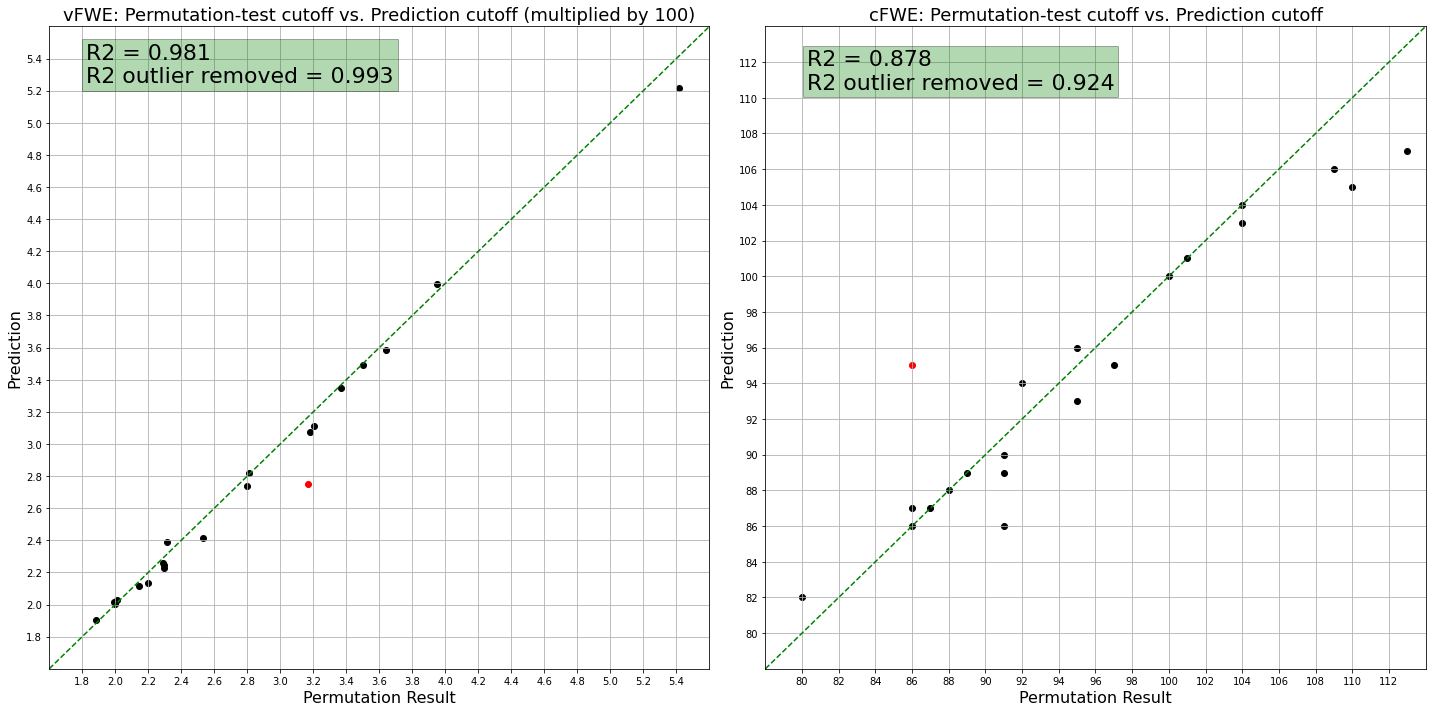

In [260]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

for i in range(len(vc_real)):
    if i == 16:
         ax[0].scatter(vc_real[i]*100,np.array(vc_predict_xgb)[i]*100, color='red')
    else:
        ax[0].scatter(vc_real[i]*100,np.array(vc_predict_xgb)[i]*100, color='black')
ax[0].set_xlim(1.6,5.6)
ax[0].set_ylim(1.6,5.6)
ax[0].set_xticks(np.arange(1.8,5.6,0.2))
ax[0].set_yticks(np.arange(1.8,5.6,0.2))
add_identity(ax[0], color='green', ls='--')
ax[0].grid()
ax[0].text(1.825, 5.25, f'R2 = {r2_voxel} \nR2 outlier removed = {r2_voxel_or}', fontsize = 22, 
         bbox = dict(facecolor = 'green', alpha = 0.3))
ax[0].set_ylabel('Prediction', fontsize=16)
ax[0].set_xlabel('Permutation Result', fontsize=16)
ax[0].set_title('vFWE: Permutation-test cutoff vs. Prediction cutoff (multiplied by 100)', fontsize=18)


for i in range(len(cc_real)):
    if i == 16:
         ax[1].scatter(cc_real[i],np.array(cc_predict_xgb)[i], color='red')
    else:
        ax[1].scatter(cc_real[i],np.array(cc_predict_xgb)[i], color='black')
ax[1].set_xlim(78,114)
ax[1].set_ylim(78,114)
ax[1].set_xticks(np.arange(80,114,2))
ax[1].set_yticks(np.arange(80,114,2))
add_identity(ax[1], color='g', ls='--')
ax[1].grid()
ax[1].text(80.25, 110.5, f'R2 = {r2_cluster} \nR2 outlier removed = {r2_cluster_or}', fontsize = 22, 
         bbox = dict(facecolor = 'green', alpha = 0.3))
ax[1].set_ylabel('Prediction', fontsize=16)
ax[1].set_xlabel('Permutation Result', fontsize=16)
ax[1].set_title('cFWE: Permutation-test cutoff vs. Prediction cutoff', fontsize=18)
fig.tight_layout()

<BarContainer object of 471 artists>

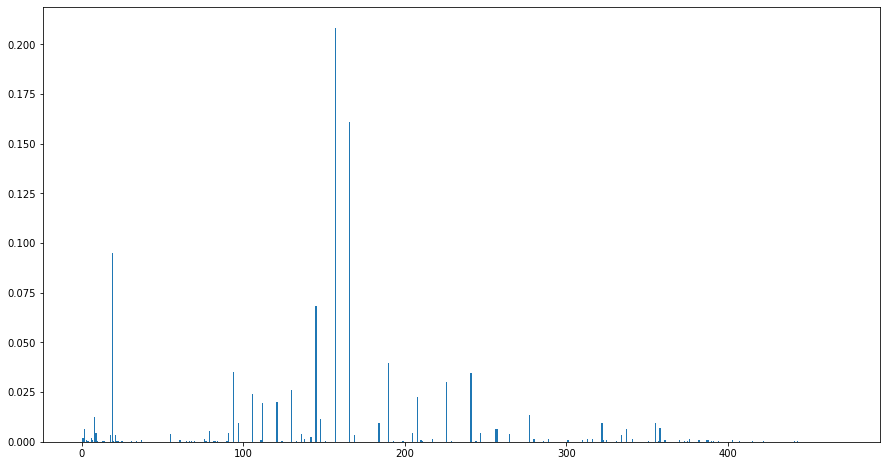

In [241]:
fig, ax = plt.subplots(1,1,figsize=(15,8),sharex=True)
ax.bar(range(len(xgb_cluster.feature_importances_)), xgb_cluster.feature_importances_)